___

<a href='http://www.pieriandata.com'> <img src='../../Pierian_Data_Logo.png' /></a>
___

# Looking at the Data, it contains 
    Column         

 0  state     

 1  numcol       

 2   yieldpercol  

 3   totalprod    

 4   stocks       

 5   priceperlb   

 6   prodvalue    
 
 7   year

** Import pandas as pd.**
 Import the files

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('honeyproduction.csv')
print(df['state'].nunique())

44


<AxesSubplot:xlabel='year', ylabel='totalprod'>

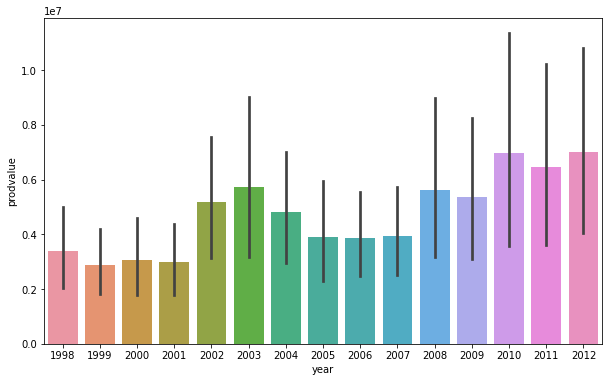

<Figure size 432x288 with 0 Axes>

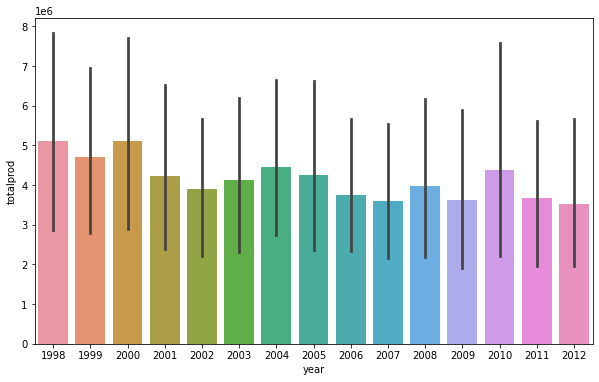

In [2]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'year',y = 'prodvalue',data = df)
plt.figure()
plt.figure(figsize=(10,6))
sns.barplot(x = 'year',y = 'totalprod',data = df)


The plots of product value is  seems to be in increasing trends but the total production of honey is decreased. The production value is the 
product of price per pound and total production(prod Value = total prod * price per pound). 

<Figure size 432x288 with 0 Axes>

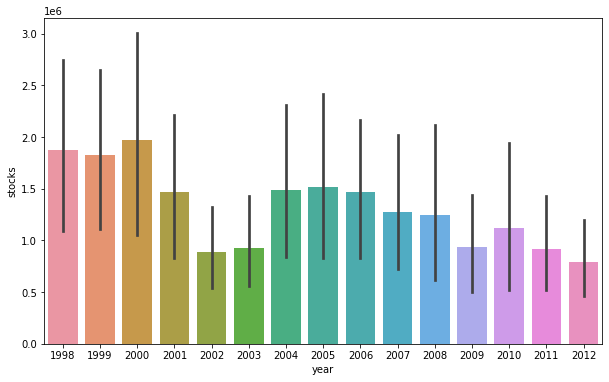

<Figure size 432x288 with 0 Axes>

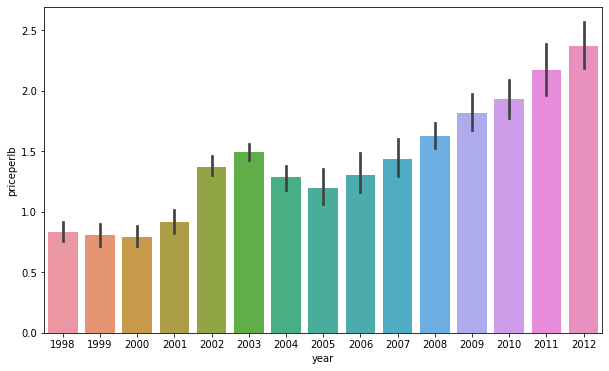

<Figure size 432x288 with 0 Axes>

In [3]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'year',y = 'stocks',data = df)
plt.figure()
plt.figure(figsize=(10,6))
sns.barplot(x = 'year',y = 'priceperlb',data = df)
plt.figure()

From the above plots , The stocks variable is in decreasing trend and prices are increasing every year

<Figure size 432x288 with 0 Axes>

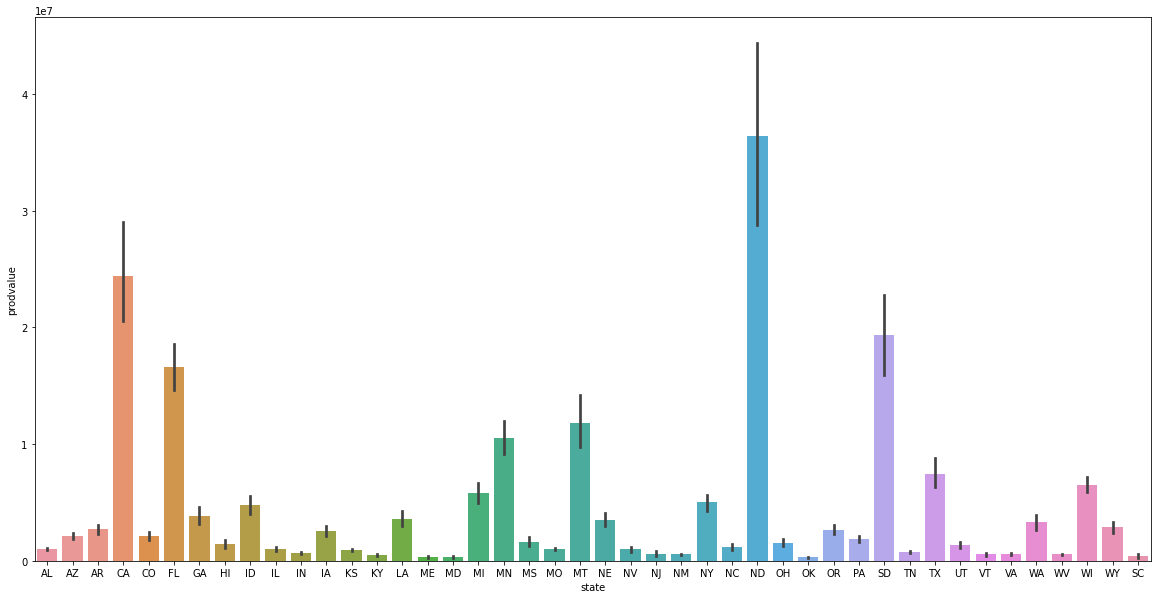

<Figure size 432x288 with 0 Axes>

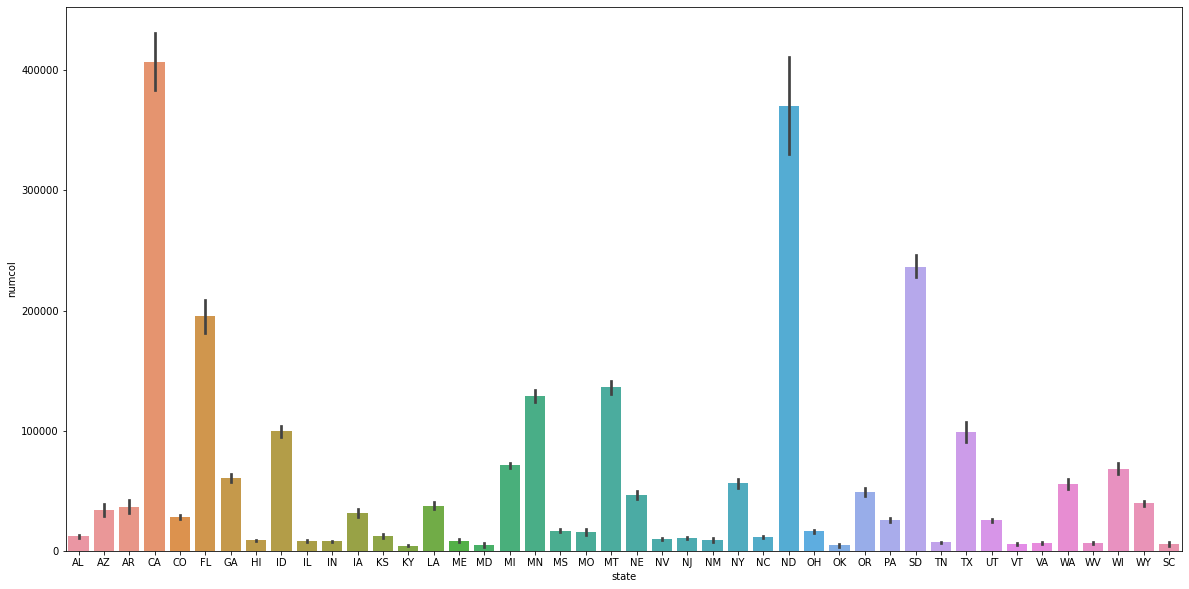

<Figure size 432x288 with 0 Axes>

In [4]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'state',y = 'prodvalue',data = df)
plt.figure()
plt.figure(figsize=(20,10))
sns.barplot(x = 'state',y = 'numcol',data = df)
plt.figure()

The production is carried out from the states and number of colonies of the states so the production value is interconnected all the variables

In [5]:
import plotly.offline
import plotly.express as px
fig = px.choropleth(df, 
                    
                    locations='state', 
                    locationmode='USA-states',
                    color='totalprod',
                    color_continuous_scale="YlGnBu",
                    range_color=(5000000, 40000000),
                    scope="usa",
                    labels={'totalprod':'Total Production'},
                    hover_name='state',
                    animation_frame="year"
                    )

fig.update_layout(title_text='Honey Bee Production')
fig.show(renderer="colab")
plotly.offline.plot(fig, "honey_Production_map.html");


## The total prod value is changing every year by statewise and year wise. 
 

In [6]:

fig = px.scatter(data_frame=df,
           x='totalprod',
           y='prodvalue',
           color='state',
           size='totalprod',
           animation_frame='year',
           title='Honey Bee Production: Totalprod vs Prodvalue')

fig.show(renderer="colab")
plotly.offline.plot(fig, "honey_Pro.html");

# The visualization of total prod and prod value of every 

So after visiualization we can not assume directly the predictor variables and response variable. There is a need of data pre processing or featuring 
a data.
The assumption we made 
1) Direct forcasting by range (2013 to 2020) as shown below
2) we featuring the data adding columns of seasonal data of according to climate changes


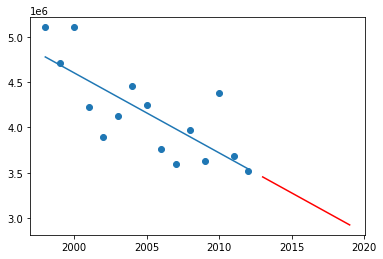

In [7]:


## In this project we do not have a seasonal or month production data so the predicted variable we are taken year
#  and response variable is total prod #
#Later we make an array  of range 2013 to 2020 for forecasting 
prod_per_year = df.groupby('year')['totalprod'].mean().reset_index()
#print(prod_per_year.head(10))
from sklearn import linear_model                          ## The variable prod_per_year take a mean of year and total prod for training
X = np.array(prod_per_year.year).reshape(-1,1)
#print(X)
y = np.array(prod_per_year.totalprod).reshape(-1,1)      
#print(y)
lnmodel = linear_model.LinearRegression()
lnmodel.fit(X,y)
y_predict = lnmodel.predict(X)
plt.scatter(X,y)
plt.plot(X,y_predict)

X_future = np.array(range(2013,2020)).reshape(-1,1)
future_predict = lnmodel.predict(X_future)
plt.plot(X_future,future_predict, c='red')
plt.show()



Second assumption is to divide the year data by seasonal changes 
We read some research paper and sceintific rewiews of declining of honey production as sure it is reduce because of reduction of honey bees
There are several reasons of decreasing the bees but the most popular ones is to usage the pesticides and climate changes like rough winter 
season. We are looking for the climate data or Pesticides data of USA but there is no data available on both views.We attached the files by which we
can conclude the reason of redection of bees.

https://friendsoftheearth.uk/nature/what-are-causes-bee-decline

https://busybees99.wordpress.com/2018/05/03/the-importance-of-honeybees/

https://enrd.ec.europa.eu/sites/default/files/enrd_publications/enrd_protecting_pollinators_from_pesticides_policy_insight.pdf

https://uniaobahia.org/why-are-honey-bees-declining/

https://justbeehoney.co.uk/blogs/just-bee-honey-blog/why-are-bees-dying


As far we know that the declination of bees most probably in winter season so we take the ratio of year.
we add the coloums in per seosonal wise in which we consider that the stocks ,yeild per colony and production value all changes as chimate change
and assume a ratio of 0.4 for winter and 0.6 for summer.Later we used the regression model in this data.


In [8]:

df['winter_YPC'] = df['yieldpercol'] * 0.4
df['summer_YPC'] = df['yieldpercol'] * 0.6

df['winter_STOCK'] = df['stocks'] * 0.4
df['summer_STOCK'] = df['stocks'] * 0.6

df['winter_PVALUE'] = df['prodvalue'] * 0.4
df['summer_PVALUE'] = df['prodvalue'] * 0.6

print(df.head(5))

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  winter_YPC  summer_YPC  winter_STOCK  summer_STOCK  \
0    818000.0  1998        28.4        42.6       63600.0       95400.0   
1   2112000.0  1998        24.0        36.0      594000.0      891000.0   
2   2033000.0  1998        26.0        39.0      675200.0     1012800.0   
3  23157000.0  1998        33.2        49.8     4930400.0     7395600.0   
4   1361000.0  1998        28.8        43.2      637600.0      956400.0   

   winter_PVALUE  summer_PVALUE  
0       327200.0       490800.0  
1       844800.0      1267200.0  
2       813200.0      1219


After these assumption we would like to ask you what would be the best choice for applying a regression model or we should change the data.


In [9]:
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,winter_YPC,summer_YPC,winter_STOCK,summer_STOCK,winter_PVALUE,summer_PVALUE
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,28.4,42.6,63600.0,95400.0,327200.0,490800.0
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,24.0,36.0,594000.0,891000.0,844800.0,1267200.0
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,26.0,39.0,675200.0,1012800.0,813200.0,1219800.0
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998,33.2,49.8,4930400.0,7395600.0,9262800.0,13894200.0
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,28.8,43.2,637600.0,956400.0,544400.0,816600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012,16.4,24.6,9200.0,13800.0,247200.0,370800.0
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012,16.4,24.6,406800.0,610200.0,2420000.0,3630000.0
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012,19.2,28.8,38000.0,57000.0,335200.0,502800.0
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012,27.6,41.4,745200.0,1117800.0,3394800.0,5092200.0


In [10]:
df1 = []
state = []
for j in df["state"].unique():
    state.append(j)
    for i in range(len(df["state"])):
        if df["state"][i] == j:
            print(df.iloc[i])
            df1.append(df.iloc[i])
 


state                   AL
numcol             16000.0
yieldpercol             71
totalprod        1136000.0
stocks            159000.0
priceperlb            0.72
prodvalue         818000.0
year                  1998
winter_YPC            28.4
summer_YPC            42.6
winter_STOCK       63600.0
summer_STOCK       95400.0
winter_PVALUE     327200.0
summer_PVALUE     490800.0
Name: 0, dtype: object
state                   AL
numcol             17000.0
yieldpercol             68
totalprod        1156000.0
stocks            185000.0
priceperlb            0.56
prodvalue         647000.0
year                  1999
winter_YPC            27.2
summer_YPC            40.8
winter_STOCK       74000.0
summer_STOCK      111000.0
winter_PVALUE     258800.0
summer_PVALUE     388200.0
Name: 43, dtype: object
state                   AL
numcol             16000.0
yieldpercol             78
totalprod        1248000.0
stocks            187000.0
priceperlb            0.59
prodvalue         736000.0
year    

In [11]:
df.corr()['prodvalue']   # numcol , prodvalue ,consumption and somwhere stocks highly correlated 

numcol           0.912796
yieldpercol      0.278977
totalprod        0.907236
stocks           0.728560
priceperlb      -0.089567
prodvalue        1.000000
year             0.139451
winter_YPC       0.278977
summer_YPC       0.278977
winter_STOCK     0.728560
summer_STOCK     0.728560
winter_PVALUE    1.000000
summer_PVALUE    1.000000
Name: prodvalue, dtype: float64

<AxesSubplot:xlabel='totalprod', ylabel='numcol'>

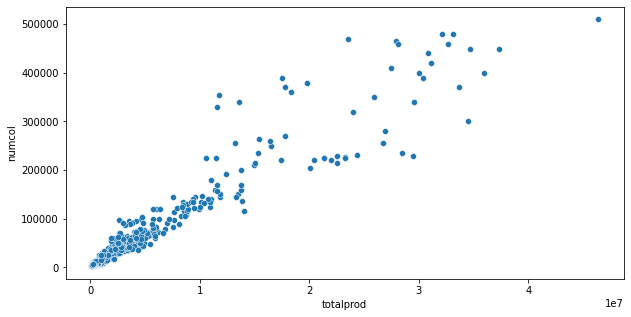

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='totalprod',y ='numcol', data=df)    ## good linear relation between totalprod and numcol

<AxesSubplot:xlabel='prodvalue', ylabel='numcol'>

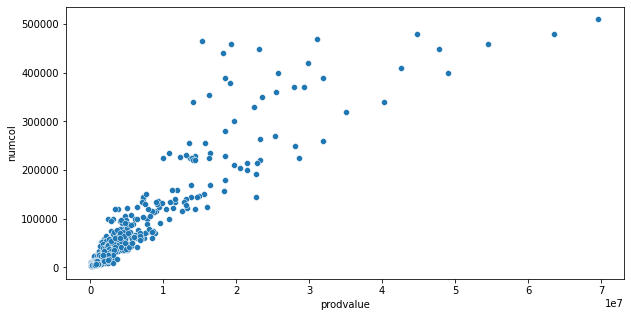

In [13]:
plt.figure(figsize=(10,5))                        ## good linear relation between prodvalue and numcol
sns.scatterplot(x='prodvalue',y ='numcol', data=df)

<AxesSubplot:xlabel='year'>

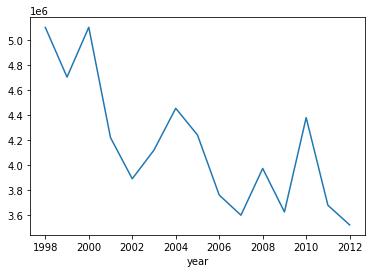

In [14]:
df.groupby('year').mean()['totalprod'].plot()

<AxesSubplot:xlabel='year'>

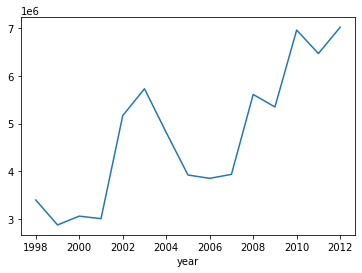

In [15]:
df.groupby('year').mean()['prodvalue'].plot()